In [1]:
from sklearn.tree import tree
from sklearn_porter import Porter
import numpy as np
import json

from sklearn.model_selection import train_test_split

In [2]:
with open('./data/y.json') as json_data:
    y = json.load(json_data)

In [3]:
with open('./data/X.json') as json_data:
    X = json.load(json_data)

### Split dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) ## TODO do K_fold

In [19]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble

In [25]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
# clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100)
# clf = ensemble.ExtraTreesClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

[[28209   343]
 [ 2028  1239]]


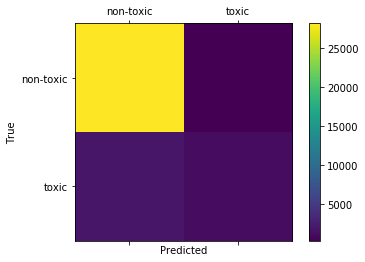

In [23]:
## stack-overflow

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ['non-toxic', 'toxic']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     28552
           1       0.78      0.38      0.51      3267

   micro avg       0.93      0.93      0.93     31819
   macro avg       0.86      0.68      0.74     31819
weighted avg       0.92      0.93      0.91     31819



### Port to javascript

In [12]:
from sklearn_porter import Porter

In [13]:
porter = Porter(clf, language='js')

In [14]:
output = porter.export(embed_data=True)

In [17]:
with open("classifier.js", "w") as text_file:
    text_file.write(output)